In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib
from pylab import *
import numpy as np
from scipy.optimize import curve_fit

pass

In [3]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

## Phage titering
### raw data

In [4]:
YG_A1 = np.array([117,124])
YG_B1 = np.array([74,107])
PK_A1 = np.array([119,97])
PK_B1 = np.array([100,111])
YY_A1 = np.array([86,117])
YY_B1 = np.array([142,124])

YG_A2 = np.array([158,148])
YG_B2 = np.array([144,nan])
PK_A2 = np.array([100,122])
PK_B2 = np.array([109,149])
YY_A2 = np.array([103,105])
YY_B2 = np.array([139,134])

YG_A3 = np.array([162,160,134])
YG_B3 = np.array([166,170,156])
PK_A3 = np.array([129,147,126])
PK_B3 = np.array([108,123,145])
YY_A3 = np.array([140,135,158])
YY_B3 = np.array([135,131,152])


### aggregate data

In [5]:
YG_A = [];YG_B = []
PK_A = [];PK_B = []
YY_A = [];YY_B = []
    
YG_A.append(YG_A1); YG_A.append(YG_A2); YG_A.append(YG_A3);
YG_B.append(YG_B1); YG_B.append(YG_B2); YG_B.append(YG_B3);
PK_A.append(PK_A1); PK_A.append(PK_A2); PK_A.append(PK_A3);
PK_B.append(PK_B1); PK_B.append(PK_B2); PK_B.append(PK_B3);
YY_A.append(YY_A1); YY_A.append(YY_A2); YY_A.append(YY_A3); 
YY_B.append(YY_B1); YY_B.append(YY_B2); YY_B.append(YY_B3); 

YG = []; PK = []; YY = [];
YG.append(YG_A); YG.append(YG_B);
PK.append(PK_A); PK.append(PK_B);
YY.append(YY_A); YY.append(YY_B); 

### data summary

In [6]:
'''
total_data = np.array([]);
for idx in range(0,3):
    for i in (YG[0][idx], YG[1][idx], PK[0][idx], PK[1][idx], YY[0][idx], YY[1][idx]):
        total_data = np.append(total_data,i);
total_data = total_data[~np.isnan(total_data)]    
global_mean = np.mean(total_data);
global_std = np.std(total_data);
'''

'\ntotal_data = np.array([]);\nfor idx in range(0,3):\n    for i in (YG[0][idx], YG[1][idx], PK[0][idx], PK[1][idx], YY[0][idx], YY[1][idx]):\n        total_data = np.append(total_data,i);\ntotal_data = total_data[~np.isnan(total_data)]    \nglobal_mean = np.mean(total_data);\nglobal_std = np.std(total_data);\n'

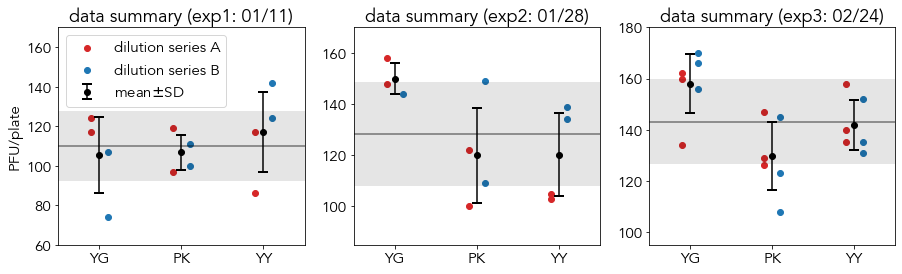

In [7]:
date_labels = ['01/11','01/28','02/24'];
plt.figure(figsize=(15,4))
for idx in range(0,3):
    subplot(1,3,idx+1)
    #mean and SD
    k = 0; x_loc = 0.5; 
    for i in (YG, PK, YY):
        i = np.append(i[0][idx],i[1][idx])
        if k == 0:
            plt.errorbar(x_loc, np.mean(i[~np.isnan(i)]), yerr = np.std(i[~np.isnan(i)]),fmt = 'o', capsize=5, capthick=2, color='black',label=r'mean$\pm$SD')
        else: 
            plt.errorbar(x_loc, np.mean(i[~np.isnan(i)]), yerr = np.std(i[~np.isnan(i)]), fmt = 'o', capsize=5, capthick=2, color='black')
        x_loc += 1; k += 1;
    labels = ['YG', 'PK', 'YY'];
    plt.xticks([0.5,1.5,2.5], labels) 
    
    #scatter plot
    x_loc2 = [0.4,0.6,1.4,1.6,2.4,2.6]
    colors = ['tab:red','tab:blue','tab:red','tab:blue','tab:red','tab:blue']
    labels = ['dilution series A','dilution series B','dilution series A','dilution series B','dilution series A','dilution series B']
    k = 0;
    total_data = np.array([]);
    
    for i in (YG[0][idx], YG[1][idx], PK[0][idx], PK[1][idx], YY[0][idx], YY[1][idx]):
        total_data = np.append(total_data,i);
        
        if k < 2:
            plt.scatter(x_loc2[k]*np.ones(len(i)), i, color = colors[k], label=labels[k]); 
        else:
            plt.scatter(x_loc2[k]*np.ones(len(i)), i, color = colors[k]); 
        k += 1;
    if idx == 0:
        plt.legend(loc='upper left')
        plt.ylabel('PFU/plate')
        plt.ylim((60,170))
    elif idx == 1:
        plt.ylim((85,170))
    elif idx == 2:
        plt.ylim((95,180))
        
    #mean and squared root
    total_data = total_data[~np.isnan(total_data)]
    global_mean = np.mean(total_data);
    global_std = np.std(total_data)
    plt.fill_between(range(0,4), global_mean+global_std, global_mean-global_std, facecolor='black', alpha=0.1)    
    plt.axhline(y=global_mean, color='black', linestyle='-',alpha=0.5)
    plt.xlim((0,3))
    plt.title('data summary (exp'+str(idx+1)+': '+date_labels[idx]+')',fontsize=18)

### error (coefficient of variation) comparison

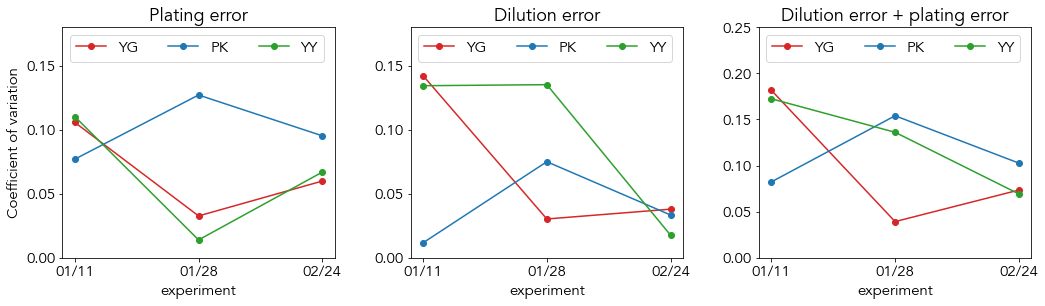

In [8]:
exp_num = 3;
xtick_labels = ['01/11','01/28','02/24'];

colors = ['tab:red','tab:blue','tab:green']
labels = ['YG','PK','YY'];

plt.figure(figsize=(15,4.5));
subplot(1,3,1)
i = 0; xx = range(1,1+exp_num);
for person in (YG, PK, YY):
    diluA = person[0];
    diluB = person[1];
    cvA = np.zeros(exp_num);
    cvB = np.zeros(exp_num);
    ave_cV = np.zeros(exp_num);
    for idx in range(0,exp_num):
        cvA[idx] = np.std(diluA[idx])/np.mean(diluA[idx]);
        cvB[idx] = np.std(diluB[idx])/np.mean(diluB[idx]);
        if (isnan(cvA[idx])):
            ave_cV[idx] = cvB[idx];
        elif (isnan(cvB[idx])):
            ave_cV[idx] = cvA[idx];
        else:
            ave_cV[idx] = 0.5*(cvA[idx]+cvB[idx]);
    plt.plot(xx,ave_cV,'o-',color=colors[i],label=labels[i]);
    i=i+1;
    
plt.xlabel('experiment')
plt.xticks(xx, xtick_labels) 
plt.ylabel('Coefficient of variation')
plt.title('Plating error',fontsize=18)
plt.legend(ncol=3,loc='upper left')
plt.ylim((0,0.18)) 

subplot(1,3,2)
i = 0; xx = range(1,1+exp_num);
for person in (YG, PK, YY):
    diluA = person[0];
    diluB = person[1];
    cv = np.zeros(exp_num);
    for idx in range(0,exp_num):
        expA = diluA[idx]; expB = diluB[idx];
        meanA = np.mean(expA[~np.isnan(expA)]); 
        meanB = np.mean(expB[~np.isnan(expB)]); 
        cv[idx] = np.std([meanA,meanB])/np.mean([meanA,meanB]);
    plt.plot(xx,cv,'o-',color=colors[i],label=labels[i]); i=i+1;
plt.xlabel('experiment')
plt.xticks(xx, xtick_labels) 
#plt.ylabel('Coefficient of variation')
plt.title('Dilution error',fontsize=18)
plt.legend(ncol=3,loc='upper left')
plt.ylim((0,0.18)) 

subplot(1,3,3)
i = 0; xx = range(1,1+exp_num);
for person in (YG, PK, YY):
    diluA = person[0];
    diluB = person[1];
    cv = np.zeros(exp_num);
    for idx in range(0,exp_num):
        expA = diluA[idx]; expB = diluB[idx];
        exp_all = np.append(expA[~np.isnan(expA)], expB[~np.isnan(expB)])
        cv[idx] = np.std(exp_all)/np.mean(exp_all);
    plt.plot(xx,cv,'o-',color=colors[i],label=labels[i]); i=i+1;
plt.xlabel('experiment')
plt.xticks(xx, xtick_labels) 
plt.title('Dilution error + plating error',fontsize=18)
plt.legend(ncol=3,loc='upper left')
plt.ylim((0,0.25)) 

tight_layout()

### plating failure rate

### consistency of results

## cell plating
### raw data

In [9]:
YG_A1 = np.array([99,96])
YG_B1 = np.array([125,96])
PK_A1 = np.array([88,86])
PK_B1 = np.array([97,87])
YY_A1 = np.array([100,85])
YY_B1 = np.array([145,111])

YG_A2 = np.array([227,114])
YG_B2 = np.array([112,nan])
PK_A2 = np.array([95,119])
PK_B2 = np.array([101,nan])
YY_A2 = np.array([92,101])
YY_B2 = np.array([128,96])

YG_A3 = np.array([77,80,143])
YG_B3 = np.array([87,73,nan])
PK_A3 = np.array([74,80,82])
PK_B3 = np.array([90,68,98])
YY_A3 = np.array([86,131,106])
YY_B3 = np.array([nan,73,100])

### data aggregation

In [11]:
YG_A = [];YG_B = []
PK_A = [];PK_B = []
YY_A = [];YY_B = []
    
YG_A.append(YG_A1); YG_A.append(YG_A2); YG_A.append(YG_A3);
YG_B.append(YG_B1); YG_B.append(YG_B2); YG_B.append(YG_B3);
PK_A.append(PK_A1); PK_A.append(PK_A2); PK_A.append(PK_A3);
PK_B.append(PK_B1); PK_B.append(PK_B2); PK_B.append(PK_B3);
YY_A.append(YY_A1); YY_A.append(YY_A2); YY_A.append(YY_A3); 
YY_B.append(YY_B1); YY_B.append(YY_B2); YY_B.append(YY_B3); 

YG = []; PK = []; YY = [];
YG.append(YG_A); YG.append(YG_B);
PK.append(PK_A); PK.append(PK_B);
YY.append(YY_A); YY.append(YY_B); 

### data summary

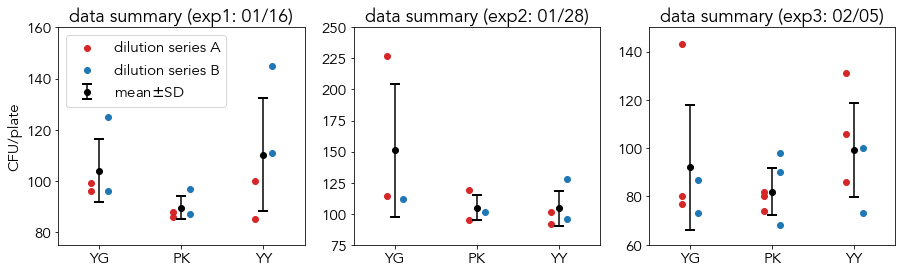

In [12]:
date_labels = ['01/16','01/28','02/05'];
plt.figure(figsize=(15,4))
for idx in range(0,3):
    subplot(1,3,idx+1)
    #mean and SD
    k = 0; x_loc = 0.5; 
    for i in (YG, PK, YY):
        i = np.append(i[0][idx],i[1][idx])
        if k == 0:
            plt.errorbar(x_loc, np.mean(i[~np.isnan(i)]), yerr = np.std(i[~np.isnan(i)]),fmt = 'o', capsize=5, capthick=2, color='black',label=r'mean$\pm$SD')
        else: 
            plt.errorbar(x_loc, np.mean(i[~np.isnan(i)]), yerr = np.std(i[~np.isnan(i)]), fmt = 'o', capsize=5, capthick=2, color='black')
        x_loc += 1; k += 1;
    labels = ['YG', 'PK', 'YY'];
    plt.xticks([0.5,1.5,2.5], labels) 
    
    #scatter plot
    x_loc2 = [0.4,0.6,1.4,1.6,2.4,2.6]
    colors = ['tab:red','tab:blue','tab:red','tab:blue','tab:red','tab:blue']
    labels = ['dilution series A','dilution series B','dilution series A','dilution series B','dilution series A','dilution series B']
    k = 0;
    for i in (YG[0][idx], YG[1][idx], PK[0][idx], PK[1][idx], YY[0][idx], YY[1][idx]):
        if k < 2:
            plt.scatter(x_loc2[k]*np.ones(len(i)), i, color = colors[k], label=labels[k]); 
        else:
            plt.scatter(x_loc2[k]*np.ones(len(i)), i, color = colors[k]); 
        k += 1;
    if idx == 0:
        plt.legend()
        plt.ylabel('CFU/plate')
        plt.ylim((75,160))
    elif idx == 1:
        plt.ylim((75,250))
    elif idx == 2:
        plt.ylim((60,150))
    plt.xlim((0,3))
    plt.title('data summary (exp'+str(idx+1)+': '+date_labels[idx]+')',fontsize=18)